<a href="https://colab.research.google.com/github/Tony162b/Customer-Segmentation/blob/main/Pipeline_Blueprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

First step of the process

The very first step of EDA is Data Sourcing, we have seen how we can access data and load into the system.

In [ ]:
df=pd.read_csv('/content/MOCK_DATA.csv')
df.head()

,id,customer_id,first_name,last_name,email,gender,income,spending_per_month,loan_burden,health_burden,major_purchases
0,1,f63e4b72-a7ca-48e1-ba57-014e414fca68,Wyatan,Cadigan,wcadigan0@who.int,Male,$156703.51,$975.78,$433525.17,0,mastercard
1,2,8a2eed34-f03b-4f78-8f2c-8c59a947314f,Harriett,Hanratty,hhanratty1@sitemeter.com,Female,$74103.09,$4087.96,$414034.91,0,mastercard
2,3,3d3c984a-3125-4f73-8e77-8d139a04f2e3,Danya,Rosoni,drosoni2@histats.com,Male,$6594.46,$28.08,$415657.74,0,mastercard
3,4,240de159-ae75-4e0d-9b3c-6e5cf9bc128c,Shermy,NaN,svye3@cam.ac.uk,Male,$18348.07,$2823.02,$314674.14,1,mastercard
4,5,64c3ccd2-af18-46f3-8545-53eac4b7de95,Tatiania,Preedy,tpreedy4@answers.com,Female,$16625.11,$544.94,$182711.32,0,mastercard


In [ ]:
df.describe()

,id,health_burden
count,1000.000000,1000.000000
mean,500.500000,0.297000
std,288.819436,0.457165
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,0.000000
75%,750.250000,1.000000
max,1000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1000 non-null   int64 
 1   customer_id         952 non-null    object
 2   first_name          934 non-null    object
 3   last_name           879 non-null    object
 4   email               1000 non-null   object
 5   gender              1000 non-null   object
 6   income              793 non-null    object
 7   spending_per_month  952 non-null    object
 8   loan_burden         698 non-null    object
 9   health_burden       1000 non-null   int64 
 10  major_purchases     788 non-null    object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


After completing the Data Sourcing, the next step in the process of EDA is Data Cleaning. It is very important to get rid of the irregularities and clean the data after sourcing it into the system.

In [ ]:
#we shall drop all the columns that are not relevant or important to the analysis
df.drop(["customer_id"], axis = 1, inplace=True)
df.drop(["id"], axis = 1, inplace=True)
df.drop(['email'],axis=1,inplace=True)

In [ ]:
df.head()

,first_name,last_name,gender,income,spending_per_month,loan_burden,health_burden,major_purchases
0,Wyatan,Cadigan,Male,$156703.51,$975.78,$433525.17,0,mastercard
1,Harriett,Hanratty,Female,$74103.09,$4087.96,$414034.91,0,mastercard
2,Danya,Rosoni,Male,$6594.46,$28.08,$415657.74,0,mastercard
3,Shermy,NaN,Male,$18348.07,$2823.02,$314674.14,1,mastercard
4,Tatiania,Preedy,Female,$16625.11,$544.94,$182711.32,0,mastercard


In [ ]:
df.dtypes

first_name            object
last_name             object
gender                object
income                object
spending_per_month    object
loan_burden           object
health_burden          int64
major_purchases       object
dtype: object

In [ ]:
#df['income'].astype(str).astype(int)

# string to int
#pd.to_numeric(df['income'])

#df["income"] = df["income"].astype("int")
#df.dtypes

In [ ]:
df.shape

(1000, 8)

In [ ]:
def clean_currency(income):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(income, str):
        return(income.replace('$', '').replace(',', ''))
    return(income)

In [ ]:
df['spending_per_month'] = df['spending_per_month'].str.replace(',','').str.replace('$','').astype('float')
df['loan_burden'] = df['loan_burden'].str.replace(',','').str.replace('$','').astype('float')

In [ ]:
#df['income'] = df['income'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
df['income'].apply(type).value_counts()

<class 'str'>      793
<class 'float'>    207
Name: income, dtype: int64

In [ ]:
df.dtypes

first_name             object
last_name              object
gender                 object
income                 object
spending_per_month    float64
loan_burden           float64
health_burden           int64
major_purchases        object
dtype: object

In [ ]:
df.columns

Index(['first_name', 'last_name', 'gender', 'income', 'spending_per_month',
       'loan_burden', 'health_burden', 'major_purchases'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
df.isnull().sum()

first_name             66
last_name             121
gender                  0
income                207
spending_per_month     48
loan_burden           302
health_burden           0
major_purchases       212
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.income.dtype

dtype('O')

In [ ]:
# string to int
#df['income'] = df['income'].astype('int')
#df.dtype

#trying to use a function that can be reused

This function here give you a general idea of the total and percentage of missing data in each column:

In [ ]:
def intitial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')
  

In [ ]:
intitial_eda_checks(df)

Total and Percentage of NaN:
                     Total  Percent
loan_burden           302    0.302
major_purchases       212    0.212
income                207    0.207
last_name             121    0.121
first_name             66    0.066
spending_per_month     48    0.048


#With specification of the threshold of the missing value percentage, the 
#following function will give you a list of columns that have missing values over that threshold

In [ ]:
def view_columns_w_many_nans(df, missing_percent):
    '''
    Checks which columns have over specified percentage of missing values
    Takes df, missing percentage
    Returns columns as a list
    '''
    mask_percent = df.isnull().mean()
    series = mask_percent[mask_percent > missing_percent]
    columns = series.index.to_list()
    print(columns) 
    return columns

# Deciding  to drop the columns with too many missing values (over a certain threshold you specify), you can use this function to accomplish the task:

In [ ]:
def drop_columns_w_many_nans(df, missing_percent):
    '''
    Takes df, missing percentage
    Drops the columns whose missing value is bigger than missing percentage
    Returns df
    '''
    series = view_columns_w_many_nans(df, missing_percent=missing_percent)
    list_of_cols = series.index.to_list()
    df.drop(columns=list_of_cols)
    print(list_of_cols)
    return df

In [ ]:
df

,first_name,last_name,gender,income,spending_per_month,loan_burden,health_burden,major_purchases
0,Wyatan,Cadigan,Male,$156703.51,975.78,433525.17,0,mastercard
1,Harriett,Hanratty,Female,$74103.09,4087.96,414034.91,0,mastercard
2,Danya,Rosoni,Male,$6594.46,28.08,415657.74,0,mastercard
3,Shermy,NaN,Male,$18348.07,2823.02,314674.14,1,mastercard
4,Tatiania,Preedy,Female,$16625.11,544.94,182711.32,0,mastercard
...,...,...,...,...,...,...,...,...
995,Burl,Tomsen,Bigender,$125303.95,4041.82,235349.80,0,NaN
996,Guinna,Degoy,Female,$41231.18,964.38,NaN,0,mastercard
997,Robena,Norsworthy,Female,$167585.40,NaN,24947.66,0,mastercard
998,Korie,Turgoose,Female,NaN,2879.23,NaN,0,mastercard


In [ ]:
df.isnull().sum()

first_name             66
last_name             121
gender                  0
income                207
spending_per_month     48
loan_burden           302
health_burden           0
major_purchases       212
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#unique values
 
df['income'].unique()

df['spending_per_month'].unique()

df['loan_burden'].unique()

df['major_purchases'].unique()

array(['mastercard', nan], dtype=object)

In [ ]:
df.corr()

,spending_per_month,loan_burden,health_burden
spending_per_month,1.000000,-0.057481,-0.023369
loan_burden,-0.057481,1.000000,0.044647
health_burden,-0.023369,0.044647,1.000000


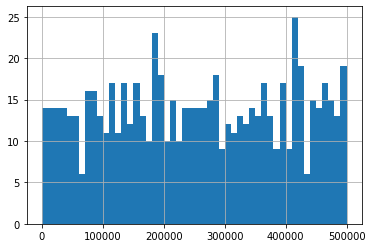

In [ ]:
fig=df['loan_burden'].hist(bins=50)